In [3]:
# libraries
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
# Path of the resource
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # if HOUSING_PATH does not exist in the project, create folder
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        # create housing.tgz in the folder created
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    # Open zip
    housing_tgz = tarfile.open(tgz_path)
    # Extract zip
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
# pandas
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
# Retrieve the csv content
fetch_housing_data()
housing = load_housing_data()
# Display the 5 first values of the table
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Display feature of the table
housing.info()
# Display distinct values in one feature
housing["ocean_proximity"].value_counts()
# Display a short table of main dataset's statistics 
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


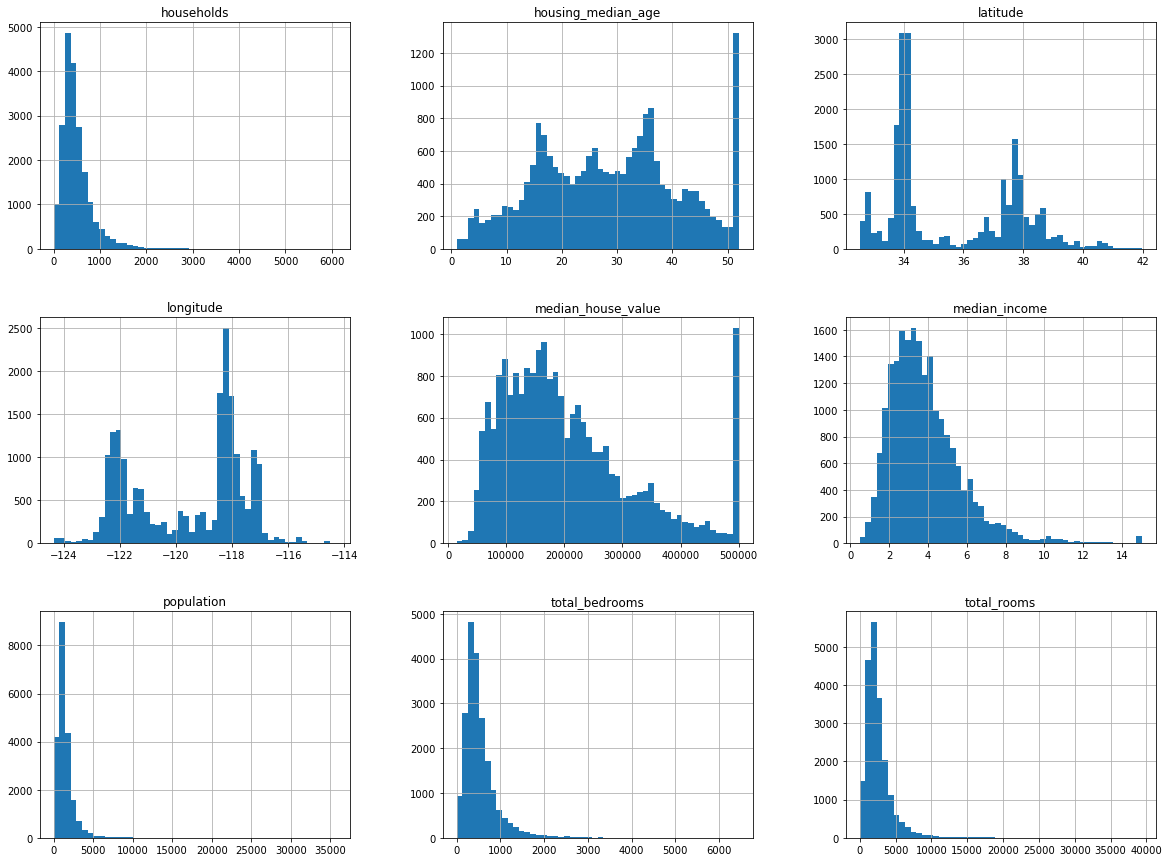

In [7]:
%matplotlib inline   
import matplotlib.pyplot as plt
# plot a glance on dataset
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [9]:
# or 
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()   # add column 'index'
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [10]:
# Or use scikit-learn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,  
random_state=42)

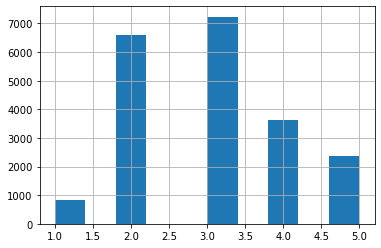

In [11]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

housing['income_cat'].hist()

In [12]:
# split dataset in stratified way
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [13]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis = 1, inplace = True)
    
strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


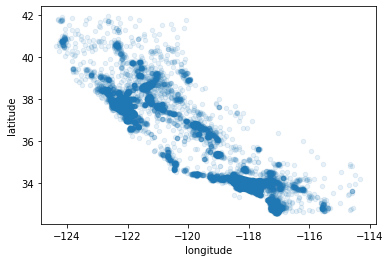

In [14]:
# Create copy of training dataset
housing = strat_train_set.copy()
# Plot to have a geographic view of the dataset
# Background axis white
plt.rcParams["figure.facecolor"] = "w"
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


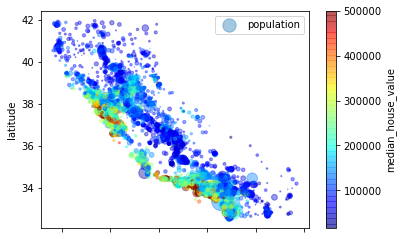

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [16]:
# Correlation matrixes
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [17]:
# drop -> create another dataset and remove a column
# housing is like the "X" -> all features but not the "median_house_value"
housing = strat_train_set.drop("median_house_value", axis = 1)
# housing_labels is the "y" -> one column like "id" and one "median_house_value"
housing_labels = strat_train_set["median_house_value"].copy()

In [18]:
# Data cleaning
# Erase rows where total_bedrooms is NaN
housing_cleaned = housing.dropna(subset=["total_bedrooms"])
# Verification
housing_cleaned.count()

longitude             16354
latitude              16354
housing_median_age    16354
total_rooms           16354
total_bedrooms        16354
population            16354
households            16354
median_income         16354
ocean_proximity       16354
dtype: int64

In [19]:
# Imputer replaces the missing values with the median of that attribute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
# Ocean_proximity in not an int -> we have to remove this column to use SimpleImputer
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
# Verify if the imputer array == housing_num median values
imputer.statistics_
housing_num.median().values

# X -> numpy array containing the transformed features
X = imputer.transform(housing_num)
# Put it back into a pandas dataframe
housing_df = pd.DataFrame(X, columns=housing_num.columns)

In [20]:
# Encode ocean proximity
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot # returns a sparse matrix
# Convert a sparse matrix to an array
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [22]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [23]:
# Custom transformer
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        # Compute room per household
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        # Compute population per household
        population_per_household = X[:, population_ix] / X[:, household_ix]
        # if you had a bedroom
        if self.add_bedrooms_per_room:
            # Compute bedrooms per room
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # Return the numpy array of X including new features
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            # Return the numpy array of X including new features
            return np.c_[X, rooms_per_household, population_per_household]

# Choose the class of the tranformer
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# Numpy array returned
housing_extra_attribs = attr_adder.transform(housing.values)

In [24]:
# Use pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [25]:
from sklearn.pipeline import FeatureUnion
# from sklearn_features.transformers import DataFrameSelector

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.sparse_output = sparse_output
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        enc = LabelBinarizer(sparse_output=self.sparse_output)
        return enc.fit_transform(X)

    
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
     ('selector', DataFrameSelector(num_attribs)),
     ('imputer', SimpleImputer(strategy="median")),
     ('attribs_adder', CombinedAttributesAdder()),
     ('std_scaler', StandardScaler()),
 ])
# cat_pipeline = Pipeline([
#      ('selector', DataFrameSelector(cat_attribs)),
#      ('label_binarizer', CustomLabelBinarizer()),
#  ])
# feature union waits for the computation of two 'child' pipelines to compute the final pipeline
full_pipeline = FeatureUnion(transformer_list=[
     ("num_pipeline", num_pipeline),
     # ("cat_pipeline", cat_pipeline),
 ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [26]:
# Linear regression model 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
# housing_prepared
# some_data_prepared
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions: [203363.02313273 340165.52231082 225650.1056982   66481.2269799
 199294.72549996]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [27]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse



69422.88161769879

In [28]:
# Decision tree algorithm
from sklearn.tree import DecisionTreeRegressor
# Decision tree regresson 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [29]:
# Cross validation with decision tree
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring ="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    
display_scores(tree_rmse_scores)

Scores:  [73642.65266849 74609.8647391  74080.64171373 73321.22698285
 74287.39710849 74670.95882919 73415.28062575 72314.66013068
 73921.33032712 75895.15283381]
Mean:  74015.9165959215
Standard deviation:  909.7899692222745


In [30]:
# Linear regression with CV
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [67383.78417581 67985.10139708 72048.46844728 74992.50810742
 68535.66280489 71602.89821633 66059.1201932  69302.44278968
 72437.02688935 68368.6996472 ]
Mean:  69871.57126682387
Standard deviation:  2630.4324574585085


In [31]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19008.009376120357

In [32]:
# Random Forest Regressor with CV
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)



Scores:  [50248.56587118 48144.59549684 50229.17255699 53498.44974727
 49907.19609661 54162.0913815  48545.10555439 49473.20891239
 54102.31493186 51976.98580863]
Mean:  51028.768635764936
Standard deviation:  2137.185932863876


In [33]:
# Save the model, score and parameters
import pickle
# Save the trained model as a pickle string
saved_model = pickle.dumps(forest_reg)
# Load the pickled model 
forest_reg_from_pickle = pickle.loads(saved_model) 
# Use the loaded pickled model to make predictions 
forest_reg_from_pickle.predict(housing_prepared) 


array([260452.  , 326547.01, 214499.  , ..., 105130.  , 211271.  ,
       468765.74])

In [34]:
# Save the model, score and parameters in a file
import joblib 
# Save the trained model as a pickle string
joblib.dump(forest_reg, 'forest_reg.pkl') 
# Load the model from the file
forest_reg_from_joblib = joblib.load('forest_reg.pkl') 
# Use the loaded model to make predictions 
forest_reg_from_joblib.predict(housing_prepared) 

array([260452.  , 326547.01, 214499.  , ..., 105130.  , 211271.  ,
       468765.74])

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [36]:
grid_search.best_estimator_
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


65991.64487994122 {'max_features': 2, 'n_estimators': 3}
57174.91112640442 {'max_features': 2, 'n_estimators': 10}
54145.53796178643 {'max_features': 2, 'n_estimators': 30}
61123.027694496246 {'max_features': 4, 'n_estimators': 3}
53734.63062655554 {'max_features': 4, 'n_estimators': 10}
51692.769105307554 {'max_features': 4, 'n_estimators': 30}
60903.90520035653 {'max_features': 6, 'n_estimators': 3}
53814.309550377184 {'max_features': 6, 'n_estimators': 10}
51905.93668516462 {'max_features': 6, 'n_estimators': 30}
61272.23121524962 {'max_features': 8, 'n_estimators': 3}
54168.65735300972 {'max_features': 8, 'n_estimators': 10}
52049.79743661417 {'max_features': 8, 'n_estimators': 30}
64459.53409626393 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55940.49672966765 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62533.09094820291 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53650.760313217186 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [37]:
# Insights of feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances



array([0.09445767, 0.09755732, 0.0552818 , 0.01962226, 0.01843448,
       0.02063727, 0.01998076, 0.40782246, 0.06364643, 0.11902329,
       0.08353626])

In [38]:
# Importance scores next to their corresponding attribute names
extra_attribs = ["rooms_per_hold", "pop_per_hold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.40782246102801956, 'median_income'),
 (0.1190232858965548, 'pop_per_hold'),
 (0.0975573219954705, 'latitude'),
 (0.09445767491934795, 'longitude'),
 (0.08353625962608732, 'bedrooms_per_room'),
 (0.06364643365753615, 'rooms_per_hold'),
 (0.05528179530584303, 'housing_median_age'),
 (0.0206372669900715, 'population'),
 (0.01998075805646, 'households'),
 (0.019622258930657686, 'total_rooms'),
 (0.018434483593951535, 'total_bedrooms')]

In [39]:
# Evaluate the test set
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

84119.5017799047

In [40]:
# Support vector machine regressor
from sklearn.svm import SVR

svr_reg = SVR(kernel = 'linear', C=100, gamma= 'auto')
svr_reg.fit(housing_prepared, housing_labels)
housing_predictions = svr_reg.predict(housing_prepared)

svr_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

72724.74464263834

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# Support vector machine regressor with GridSearchCV
svr_reg = SVR(kernel = 'linear')
param_grid = [
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]},
]

grid_search = GridSearchCV(svr_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)
print("Best params : ", grid_search.best_params_)
print("Best estimator : ", grid_search.best_estimator_)


Best params :  {'C': 1000, 'gamma': 0.001}
Best estimator :  SVR(C=1000, gamma=0.001, kernel='linear')


In [42]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'linear', C=1000, gamma= 0.001)
svr_reg.fit(housing_prepared, housing_labels)
housing_predictions = svr_reg.predict(housing_prepared)

svr_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse



71193.90207057368

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

distributions = {
    'kernel' : ['linear', 'rbf'],
    'C' : reciprocal(20, 20000),
    'gamma' : expon(scale=1.0)
}
svr_reg = SVR()
search = RandomizedSearchCV(svr_reg, distributions)

search.fit(housing_prepared, housing_labels)
search.best_params_

